# Tagup Data Science Exercise

ExampleCo, Inc is gathering several types of data for its fleet of very expensive machines.  These very expensive machines have three operating modes: *normal*, *faulty* and *failed*.   The machines run all the time, and usually they are in normal mode.  However, in the event that the machine enters faulty mode, the company would like to be aware of this as soon as possible.  This way they can take preventative action to avoid entering failed mode and hopefully save themselves lots of money.

They collect four kinds of timeseries data for each machine in their fleet of very expensive machines.  When a machine is operating in *normal* mode the data behaves in a fairly predictable way, but with a moderate amount of noise.  Before a machine fails it will ramp into *faulty* mode, during which the data appears visibly quite different.  Finally, when a machine fails it enters a third, and distinctly different, *failed* mode where all signals are very close to 0.

You can download the data here: [exampleco_data](https://drive.google.com/open?id=1b12u6rzkG1AxB6wLGl7IBVoaoSoZLHNR)

__Your main objective: to develop an automated method to pinpoint the times of fault and failure in this machine__.  Keep in mind that you will be sharing these results with the executives at ExampleCo, so to the best of your ability, try to explain what you are doing, what you've shown, and why you think your predictions are good.


A few notes to help:
1. A good place to start is by addressing the noise due to communication
   errors.
2. Feel free to use any libraries you like. Your final results should be
   presented in this Python notebook.
3. There are no constraints on the techniques you bring to bear, we are curious
   to see how you think and what sort of resources you have in your toolbox.
4. Be sure to clearly articulate what you did, why you did it, and how the
   results should be interpreted. In particular you should be aware of the
   limitations of whatever approach or approaches you take.
5. Don't feel compelled to use all the data if you're not sure how. Feel free
   to focus on data from a single unit if that makes it easier to get started.
6. Don't hesitate to reach out to datasciencejobs@tagup.io with any questions!

# Detect the beginning of the “faulty” period, to shut down the machines before failure occurs for the ExampleCo. engineers.

In [2]:
# Libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import datetime
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams.update({'font.size':10})
import warnings
warnings.filterwarnings('ignore')

### Exploratory data analysis

*There are 19 csv indentical files provided in the data set

*In this section of "Exploratory data analysis" one of the file "machine_0.csv" is analysed in detailed. The file consists of 5 coulmns with first being time and the other 4 columns gives the time sereis data for each machine. The time column is converted to date time object for Python in order to pick 'faulty' mode of the machine to prevent the 'failure' mode

*The plot for the time series data in Figure 2 to Figure 5, shows that the machine follows a sinusoidal wave pattern for each of the 4 signals in'normal' mode and the before going to 'failed' mode the signals gets rid of the wave pattern and reports higher than the 'normal' mode for few days and finally goes to zero in the 'faulty' mode


In [3]:
data_0=pd.read_csv(r'C:\Neeharika\Tagup_tech\exampleco_data\machine_0.csv')
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   object 
 1   0           3000 non-null   float64
 2   1           3000 non-null   float64
 3   2           3000 non-null   float64
 4   3           3000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [4]:
data_0.head()

,Unnamed: 0,0,1,2,3
0,2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
1,2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2,2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
3,2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
4,2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561


In [5]:
# the column "Unnamed:0" is converted to date time object

data_0.rename(columns = { 'Unnamed: 0':'Date','0':'A', 
                              '1':'B','2':'C','3':'D'}, inplace = True) 
data_0['Date']= data_0['Date'].astype('datetime64[ns]')

In [6]:
data_0['Time_diff'] = data_0['Date'].diff(-1).dt.total_seconds().div(3600)
data_0.Time_diff.head()
#every eight hours the data is reported 

0   -8.002668
1   -8.002668
2   -8.002668
3   -8.002668
4   -8.002668
Name: Time_diff, dtype: float64

Figure1


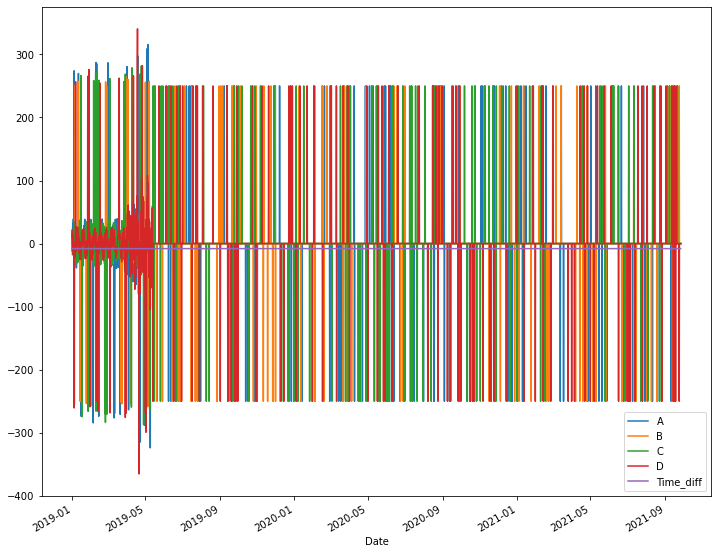

In [7]:
data_0.set_index('Date', inplace=True)
data_0.plot()
print("Figure1")

Figure2


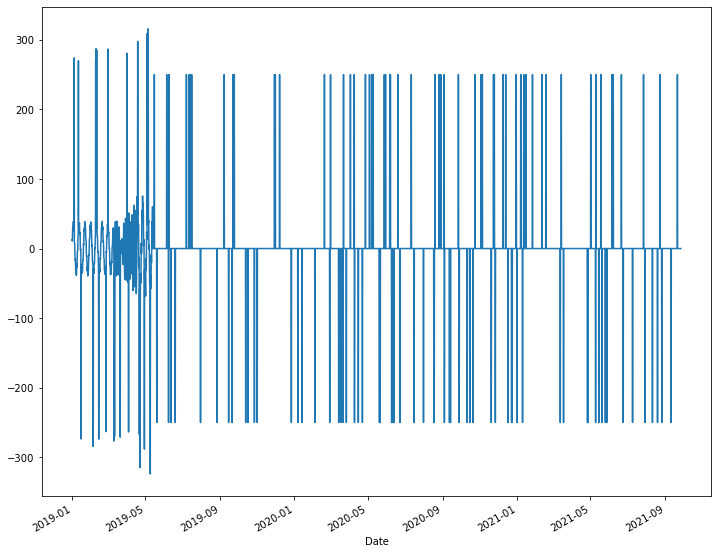

In [8]:
data_0.A.plot()
print("Figure2")

Figure3


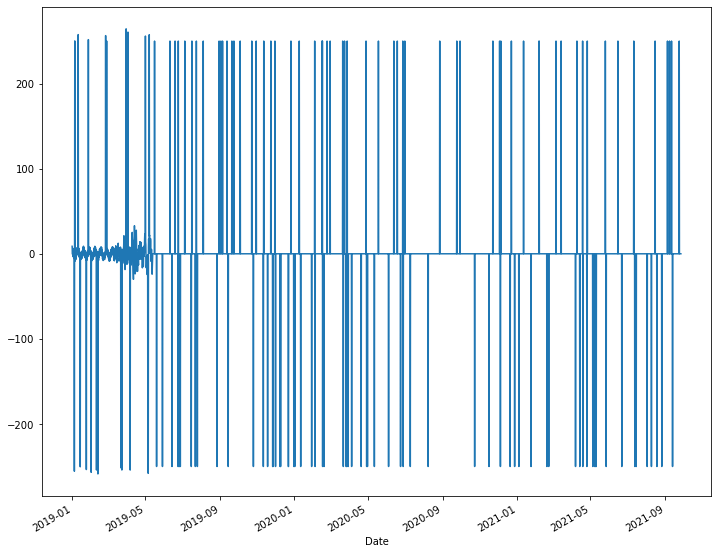

In [9]:
data_0.B.plot()
print("Figure3")

Figure4


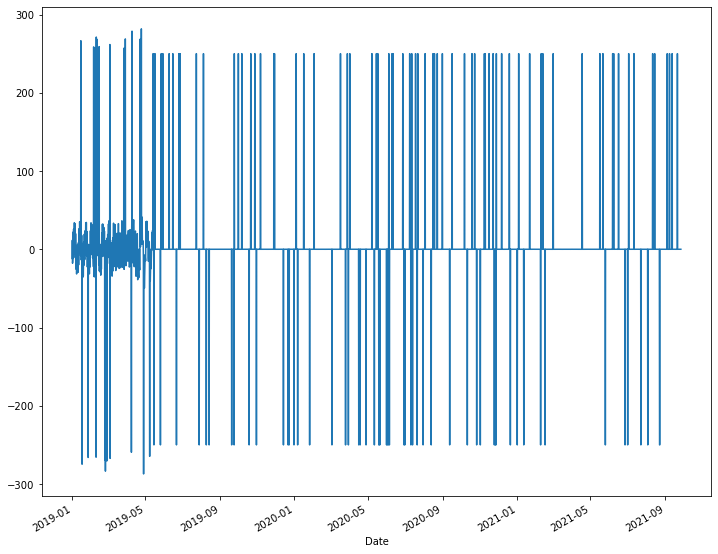

In [10]:
data_0.C.plot()
print("Figure4")

Figure5


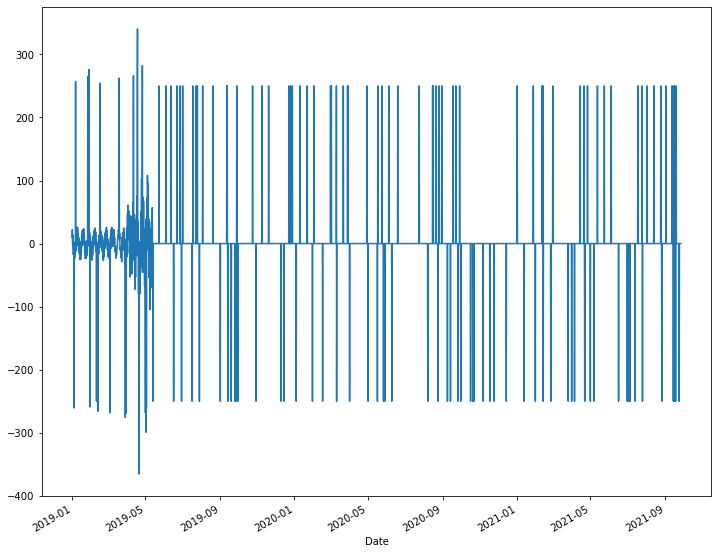

In [11]:
data_0.D.plot()
print("Figure5")

### Data wrangling and feature engineering 

*In this section, the 4 time series data is analysed seperately to check for the time when the machine enters the "faulty" mode

*The data wrangling consist of cleaning the data by getting rid of the outliers. The time sereis data consist of spikes of high value signals all throughout the timeline for all the 4 signals. The Figures 2, 3, 4 and 5 above shows that the values of the signals above and below 40 and -40 respectly are outliers. These outliers were removed applying a cuttoff condition as shown in Figure 6, 8 10 and 12

*The feature engineering  applied is the wave structure for the time series data. When the machine is in the normal mode the   
waves pattern are well defined, but as the machine enters the 'faulty' mode the magnitude of the wave signals increases and     does not follow a regular pattern. We can pick up the peak of the normal wave pattern as a cuttoff and detect the time when   
the machine starts giving signal higher than the normal peak value. That time can be reported as an "ALERT" for the ExampleCo   engineers that the machine is about to enter the 'failure' mode. 


*The best estimate of time when the machine enter the 'faulty' mode by each time series data are:

  A data: 2019-01-03 00:00:57.619206402
  
  B data: 2019-03-17 16:36:19.926642214
  
  C data: 2019-04-09 00:47:03.341113705
  
  D data: 2019-01-09 00:03:50.476825608
  
  
*By analysing each of the time series data and the wave pattern, I suggest to consider the "D" time series data as a reference to check for the performance of the machine. This column is indicated as column name "3" by the original file. The first reason being the "D" time series gives an earlier indication for the fault in the machine and the wave pattern was easy to analyse as shown in the plot below in Figure 7. 
  



##### Analysis of D signal

In [12]:
data_0.reset_index(inplace=True)
data_0_D=data_0[['Date','D']]

In [13]:
index_signal = data_0_D[data_0_D['D'] > 40].index 
data_0_D.drop(index_signal,inplace=True)

In [14]:
index_signal2= data_0_D[data_0_D['D'] <-40].index 
data_0_D.drop(index_signal2,inplace=True)

Figure 6


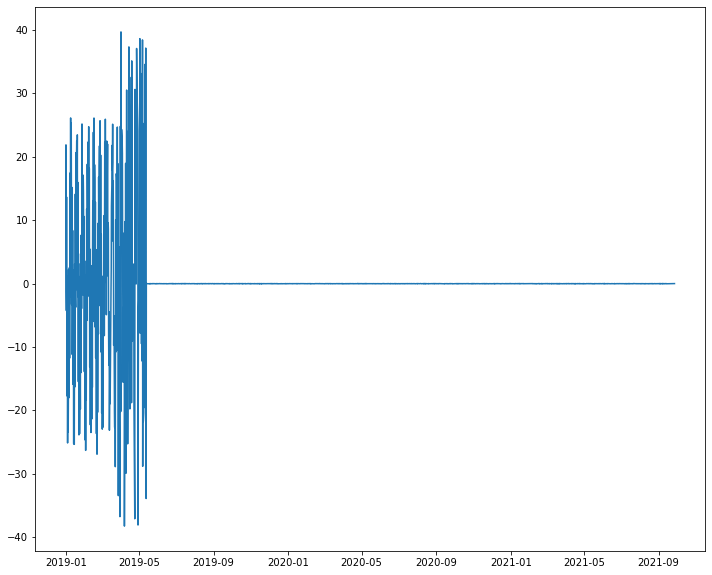

In [15]:
plt.plot(data_0_D.Date,data_0_D.D)
print("Figure 6")

Figure 7


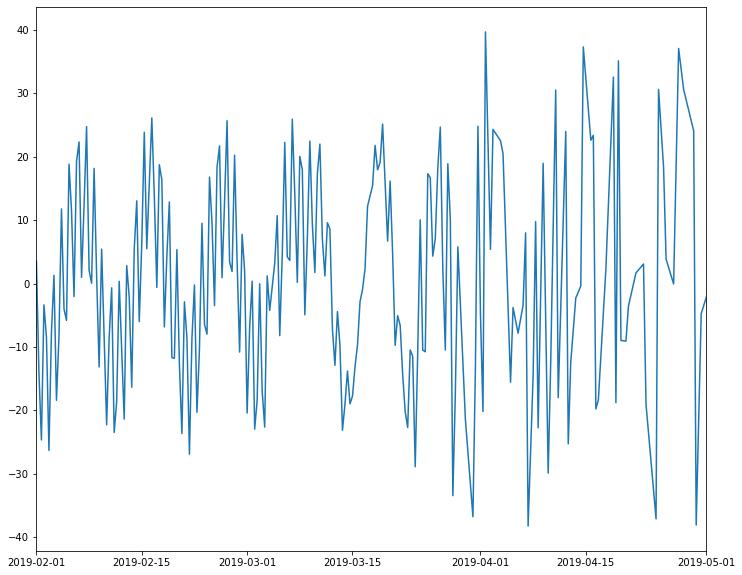

In [16]:
plt.plot(data_0_D.Date,data_0_D.D)
plt.xlim([datetime.date(2019, 2,1), datetime.date(2019, 5,1)])
print ("Figure 7")

In [17]:
data_0_D_faulty = data_0_D.query("D>24")

In [18]:
print('The machine is in faulty mode through D signal',data_0_D_faulty.Date.iloc[0])

The machine is in faulty mode through D signal 2019-01-09 00:03:50.476825608


##### Analysis for 'C' signal

In [19]:
data_0_C=data_0[['Date','C']]

In [20]:
index_signal = data_0_C[data_0_C['C'] > 40].index 
data_0_C.drop(index_signal,inplace=True)

In [21]:
index_signal2= data_0_C[data_0_C['C'] <-40].index 
data_0_C.drop(index_signal2,inplace=True)

Figure 8


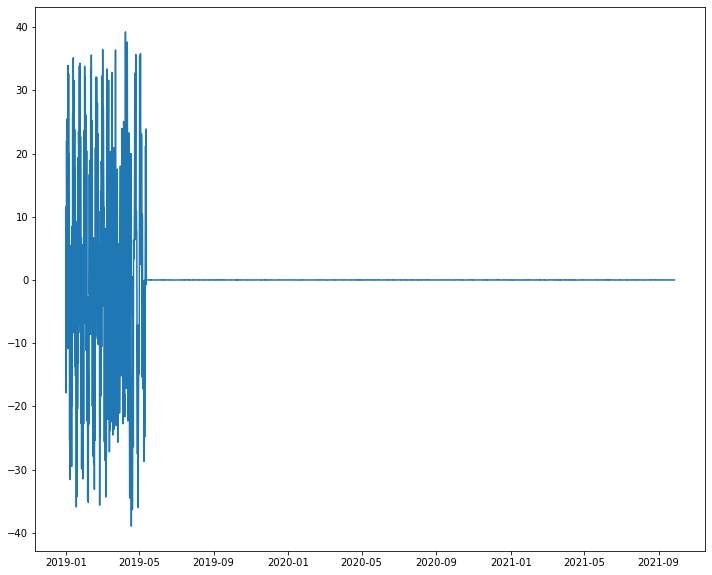

In [22]:
plt.plot(data_0_C.Date,data_0_C.C)
print("Figure 8")

Figure 9


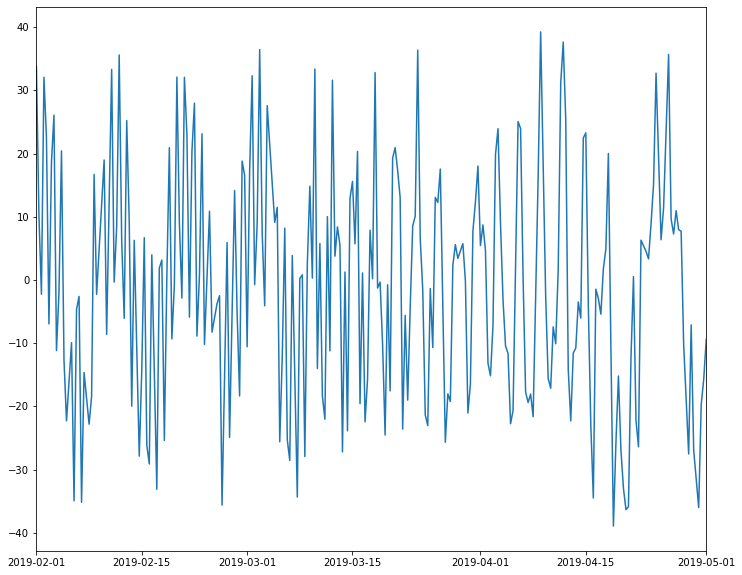

In [23]:
plt.plot(data_0_C.Date,data_0_C.C)
plt.xlim([datetime.date(2019, 2,1), datetime.date(2019, 5,1)])
print("Figure 9")

In [24]:
data_0_C_faulty = data_0_C.query("C>37")

In [25]:
print('The machine is in faulty mode through C signal',data_0_C_faulty.Date.iloc[0])

The machine is in faulty mode through C signal 2019-04-09 00:47:03.341113705


##### Analysis of 'A' signal

In [26]:
data_0_A=data_0[['Date','A']]

In [27]:
index_signal = data_0_A[data_0_A['A'] > 40].index 
data_0_A.drop(index_signal,inplace=True)

In [28]:
index_signal2= data_0_A[data_0_A['A'] <-40].index 
data_0_A.drop(index_signal2,inplace=True)

Figure 10


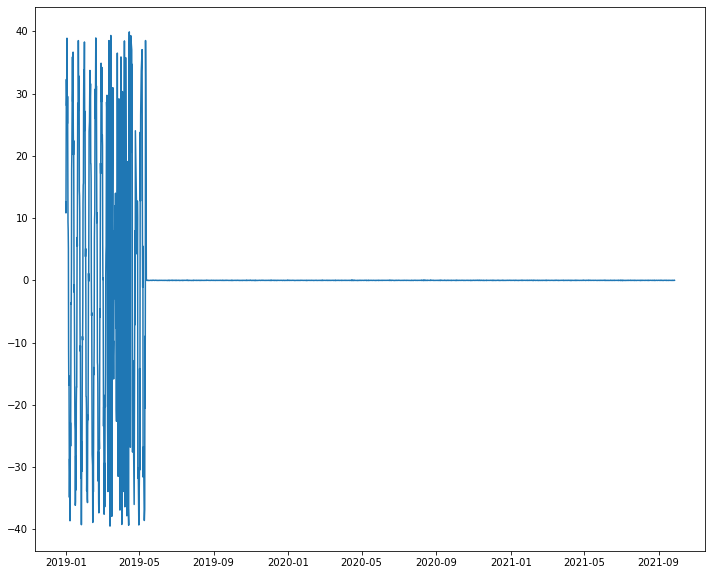

In [29]:
plt.plot(data_0_A.Date,data_0_A.A)
print("Figure 10")

Figure 11


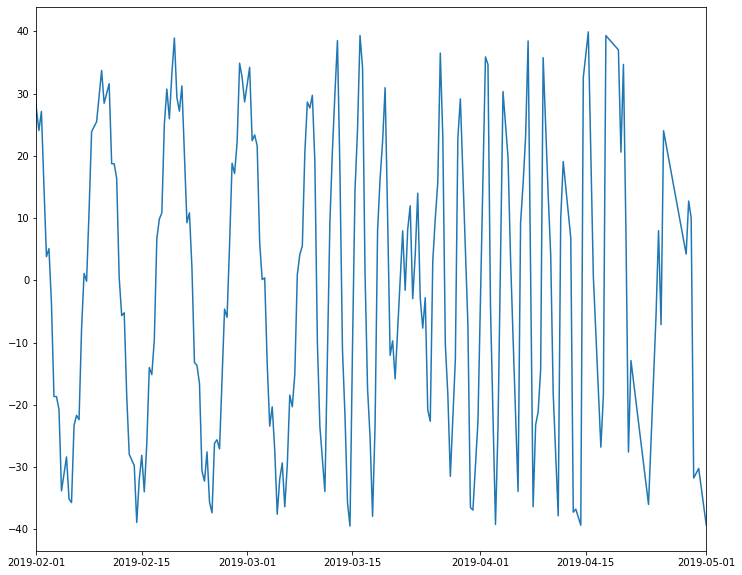

In [30]:
plt.plot(data_0_A.Date,data_0_A.A)
plt.xlim([datetime.date(2019, 2,1), datetime.date(2019, 5,1)])
print("Figure 11")

In [31]:
data_0_A_faulty = data_0_A.query("A>37")

In [32]:
print('The machine is in faulty mode through A signal',data_0_A_faulty.Date.iloc[0])

The machine is in faulty mode through A signal 2019-01-03 00:00:57.619206402


##### Ananlysis of 'B' signal

In [33]:
data_0_B=data_0[['Date','B']]

In [34]:
index_signal = data_0_B[data_0_B['B'] > 40].index 
data_0_B.drop(index_signal,inplace=True)

In [35]:
index_signal2= data_0_B[data_0_B['B'] <-40].index 
data_0_B.drop(index_signal2,inplace=True)

Figure 12


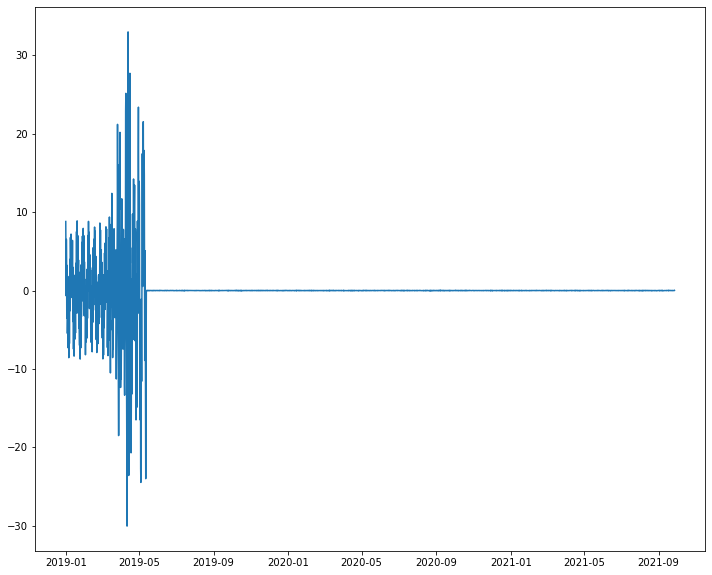

In [36]:
plt.plot(data_0_B.Date,data_0_B.B)
print("Figure 12")

Figure 13


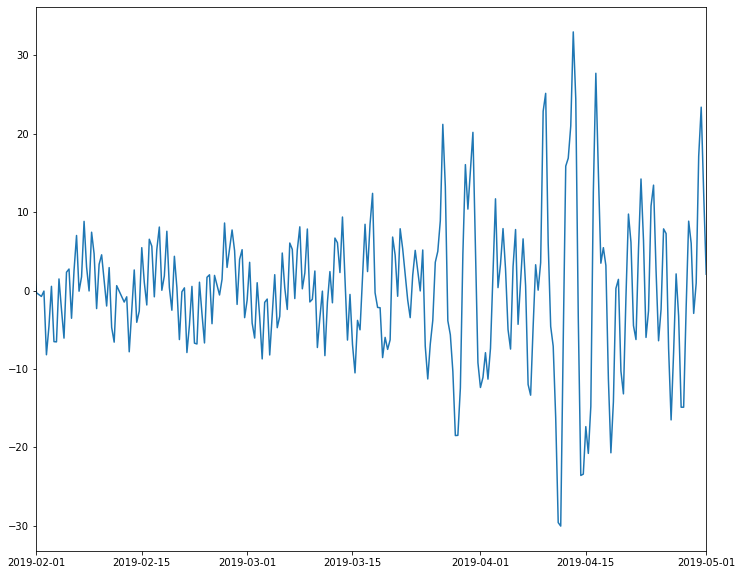

In [37]:
plt.plot(data_0_B.Date,data_0_B.B)
plt.xlim([datetime.date(2019, 2,1), datetime.date(2019, 5,1)])
print("Figure 13")

In [38]:
data_0_B_faulty = data_0_B.query("B>10")

In [39]:
print('The machine is in faulty mode through B signal',data_0_B_faulty.Date.iloc[0])

The machine is in faulty mode through B signal 2019-03-17 16:36:19.926642214


In [40]:
data_1=pd.read_csv(r'C:\Neeharika\Tagup_tech\exampleco_data\machine_1.csv')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   object 
 1   0           3000 non-null   float64
 2   1           3000 non-null   float64
 3   2           3000 non-null   float64
 4   3           3000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [41]:
data_1.rename(columns = { 'Unnamed: 0':'Date','0':'A', 
                              '1':'B','2':'C','3':'D'}, inplace = True) 
data_1['Date']= data_1['Date'].astype('datetime64[ns]')

data_1.set_index('Date', inplace=True)

Figure 14


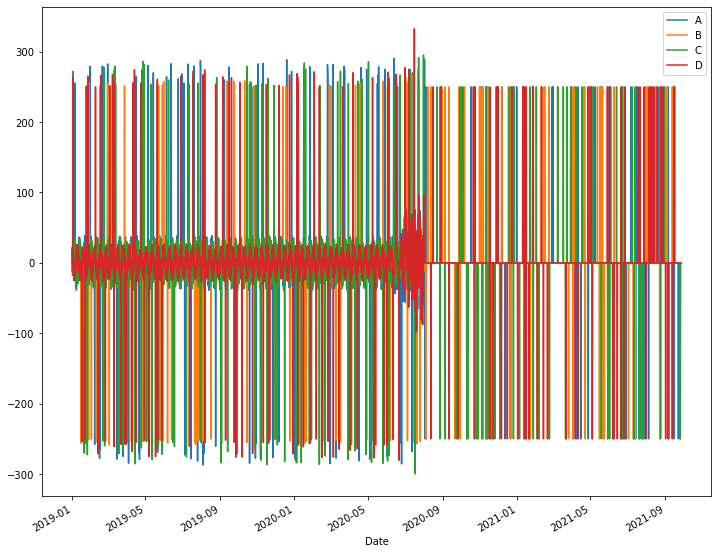

In [42]:
data_1.plot()
print("Figure 14")

Figure 15


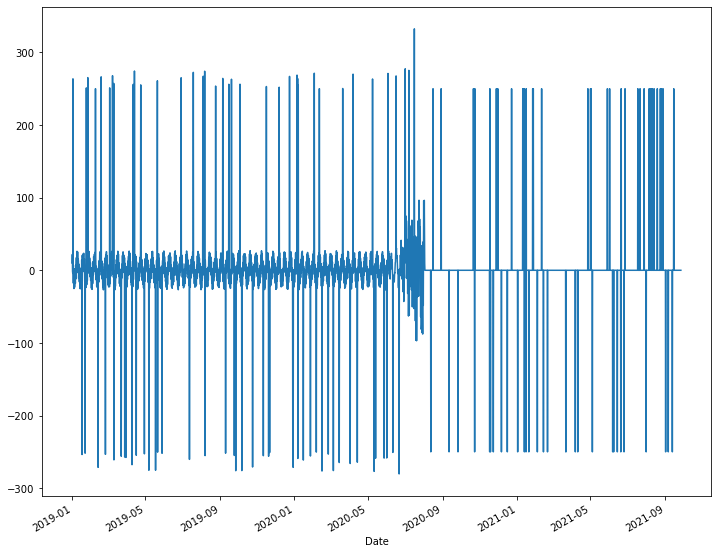

In [43]:

data_1['D'].plot()
print("Figure 15")

Figure 16


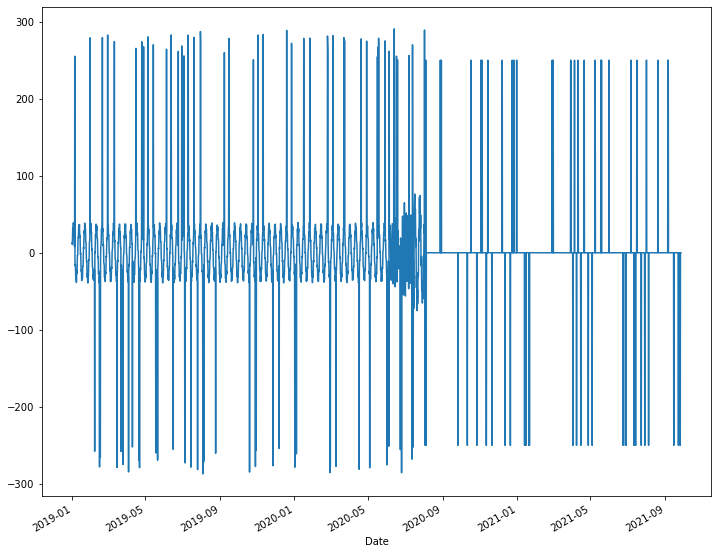

In [44]:
data_1['A'].plot()
print("Figure 16")

Figure 17


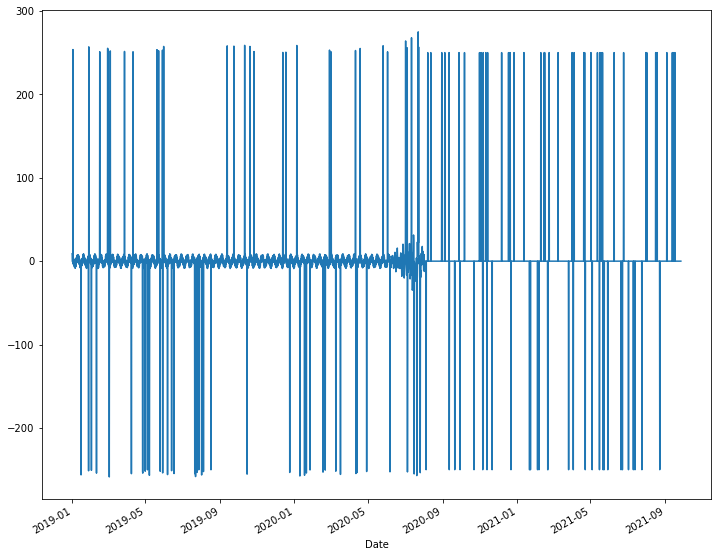

In [45]:

data_1['B'].plot()
print("Figure 17")

Figure 18


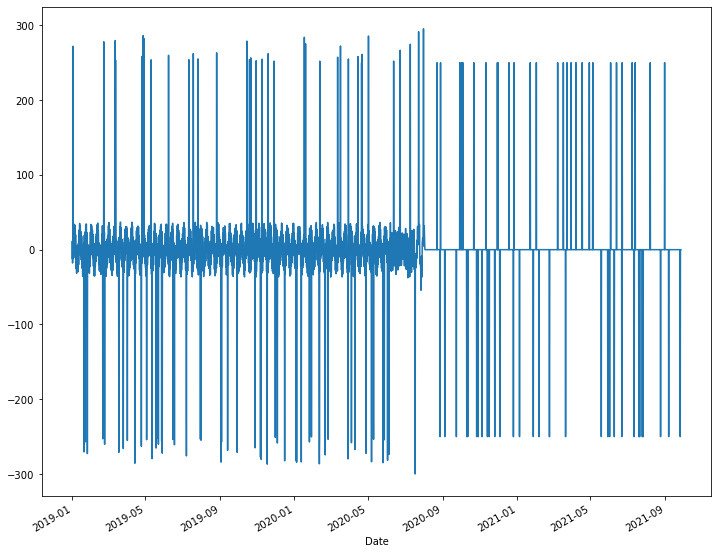

In [46]:

data_1['C'].plot()
print("Figure 18")

### Results and Conclusions 


*The results shows that the machine which corresponds to time series data reported in machine_0.csv file entered the 'faulty"mode on 2019-01-09 00:03:50.476825608 and should be attended as soon as possible to avoid going in the failure mode

*Therefore we can conclude that by just analysing the time series data denoted by the column "3" we can detect the strating of the 'faulty' mode and should be attended before it reaches to 'failure' mode 

*The other csv file in the set of data provided was primilarly analysed. Figure 14 to Figure 18 gives the same result

*It seems the 19 csv file corresponds to similar type of machine

### Strengths and Limitations of the approach 

*Data Visualization technique was helpful to detect the time of 'faulty' mode and to prevent the machine to go to 'failure' mode

*Since we have 19 similar file, there is an option to do more detailed analysis with Machine Learning algorithm

*I suggest to apply RandomForestClassifier with bootstrapping technique to predict the time when the machine reaches the'faulty' mode

*The algorithm will give a more confident decision on the importance of each features i.e the 4 time series

*The Machine Learning technique will be faster and more precise